In [74]:
# Import Packages and get the correct Filepath
# import packages
def forecast_out_model(data, order=(3, 0)):
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from scipy import stats as st
from sklearn import linear_model
import math as m
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
import time  # Imports system time module to time your script
import statsmodels.api as sm
from patsy import dmatrices
from datetime import datetime
import datetime as dt
filepath = 'C:/Users/polhe/Documents/ProjectUB'
df = pd.read_csv('UB-data.csv')
df['MonthDt'] = pd.TimedeltaIndex(df['MonthDt'], unit='d') + dt.datetime(1899,12,30)
df.head()


,MonthDt,3,3290,3939,...,3943,3952,4055,4933
0,2005-01-01,0.700000,1.752000,975.120,...,1229980.40,236557.00,18577,6538.0
1,2005-02-01,0.717000,1.806579,1188.400,...,1219553.25,232491.25,17865,5925.0
2,2005-03-01,0.640000,1.883409,1137.575,...,1277321.75,280664.75,18548,6626.0
3,2005-04-01,0.600000,1.836905,922.500,...,1322956.40,215444.80,18903,6333.0
4,2005-05-01,0.571429,1.854048,1052.880,...,1348484.25,226126.00,17667,6462.0


# Rename Columns and display whole Dataframe

In [75]:
df.rename(columns={'3':'UB_ShellEgg_Midwest'},
inplace=True)
df.rename(columns={'3290':'Omaha_Corn_Prices'},
inplace=True)
df.rename(columns={'3939':'Weekly_Inventory_Cartoned_for_RR'},
inplace=True)
df.rename(columns={'3940':'Weekly_Inventory_Breaking_Stock'},
inplace=True)
df.rename(columns={'3943':'Weekly_Egg_for_dried_or_liquid'},
inplace=True)
df.rename(columns={'3952':'Weekly_Retail_Purchases'},
inplace=True)
df.rename(columns={'4055':'Cold_Storage_Eggs'},
inplace=True)
df.rename(columns={'4933':'Monthly_Egg_Production'},
inplace=True)


display(df)



,MonthDt,UB_ShellEgg_Midwest,Omaha_Corn_Prices,Weekly_Inventory_Cartoned_for_RR,...,Weekly_Egg_for_dried_or_liquid,Weekly_Retail_Purchases,Cold_Storage_Eggs,Monthly_Egg_Production
0,2005-01-01,0.700000,1.752000,975.120,...,1229980.40,236557.00,18577,6538.0
1,2005-02-01,0.717000,1.806579,1188.400,...,1219553.25,232491.25,17865,5925.0
2,2005-03-01,0.640000,1.883409,1137.575,...,1277321.75,280664.75,18548,6626.0
3,2005-04-01,0.600000,1.836905,922.500,...,1322956.40,215444.80,18903,6333.0
4,2005-05-01,0.571429,1.854048,1052.880,...,1348484.25,226126.00,17667,6462.0
...,...,...,...,...,...,...,...,...,...
193,2021-02-01,1.332000,5.315263,1520.750,...,1390306.00,246417.25,29587,7439.5
194,2021-03-01,1.429130,5.333261,1546.680,...,1381241.75,220865.25,26743,8248.1
195,2021-04-01,1.029524,6.104881,1669.450,...,1450548.00,223201.80,24164,7942.7
196,2021-05-01,0.930500,7.077875,1677.520,...,1483800.40,213174.00,26172,8065.5


# Lets try to see whats going on



In [76]:
# Summary stats
print("Summary Stats")
print(df.describe())
print("Summary Stats")


Summary Stats
       UB_ShellEgg_Midwest  Omaha_Corn_Prices  \
count           198.000000         198.000000   
mean              1.163095           4.131702   
std               0.372294           1.540332   
min               0.571429           1.485000   
25%               0.897841           3.281220   
50%               1.141774           3.639312   
75%               1.339545           4.916557   
max               2.713810           8.110217   

       Weekly_Inventory_Cartoned_for_RR  Weekly_Inventory_Breaking_Stock  \
count                        198.000000                       198.000000   
mean                        1152.713283                       276.111970   
std                          191.546647                        39.813646   
min                          855.960000                       191.925000   
25%                         1007.741250                       244.531250   
50%                         1102.462500                       268.175000   
75%         

In [72]:
# Might need this later because the other stuff is in weeks
Averageperweek=7081.760101/4.345
print(Averageperweek)

1629.864234982739


In [77]:
y, X = dmatrices('UB_ShellEgg_Midwest ~ Omaha_Corn_Prices + Weekly_Inventory_Cartoned_for_RR + Weekly_Inventory_Breaking_Stock + Weekly_Egg_for_dried_or_liquid + Weekly_Retail_Purchases + Cold_Storage_Eggs + Monthly_Egg_Production', data=df, return_type='dataframe')

regr = linear_model.LinearRegression()
regr.fit(X, y)
res = sm.OLS(y, X).fit()
print(res.summary())
print(res.params)

                             OLS Regression Results                            
Dep. Variable:     UB_ShellEgg_Midwest   R-squared:                       0.257
Model:                             OLS   Adj. R-squared:                  0.229
Method:                  Least Squares   F-statistic:                     9.375
Date:                 Thu, 21 Oct 2021   Prob (F-statistic):           5.74e-10
Time:                         14:12:09   Log-Likelihood:                -55.439
No. Observations:                  198   AIC:                             126.9
Df Residuals:                      190   BIC:                             153.2
Df Model:                            7                                         
Covariance Type:             nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

2.659


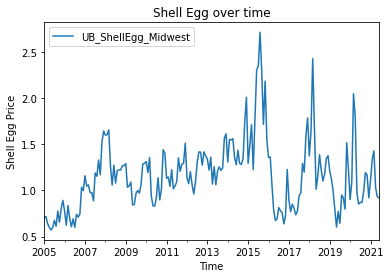

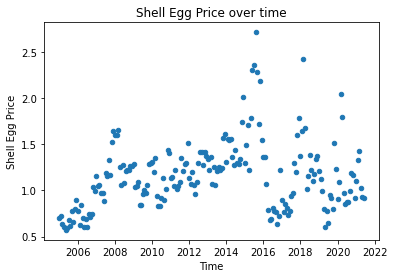

<AxesSubplot:xlabel='UB_ShellEgg_Midwest', ylabel='Omaha_Corn_Prices'>

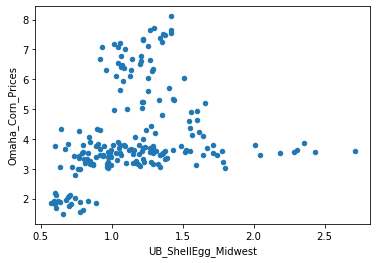

In [78]:
# Things I notice
# I want to test for multicollinearity, some of these numbers in my "OSL Regression" may be exaggerated.
# I want to think about non-stationarity, this is 15 years of data
    #stationarity conditions, Mean is constant, Σ is constant, no seasonality
# I want to think about which vars drive my dependant var and which lag it
# My R-squared is pretty small
# there is a lot of Kurtosis
#normal Kurtosis is 3 so I will create a var named "excess_kurtosis"
excess_kurtosis = 5.659-3
print(excess_kurtosis)
# the kurtosis is positive and so we know that this is leptokurtic which makes sense for a commodity.
# because this is leptokurtic, I may want to  do a transformation and use log change or a moving average price
#ARIMA model is prob the best for this
#data is highly skewed



# A few graphs
 
x = ['MonthDt']
y = ['UB_ShellEgg_Midwest']
df.plot(x='MonthDt', y = 'UB_ShellEgg_Midwest')

plt.xlabel('Time')
plt.ylabel('Shell Egg Price')
plt.title('Shell Egg over time')
plt.show()

# Scatter Plot
df.plot(x='MonthDt', y = 'UB_ShellEgg_Midwest', kind='scatter')
plt.xlabel('Time')
plt.ylabel('Shell Egg Price')
plt.title('Shell Egg Price over time')
plt.show()



df.plot(x='UB_ShellEgg_Midwest', y = 'Omaha_Corn_Prices', kind= 'scatter')








# The first thing I want to do is test for multicollinearity-we can think about the other stuff after this

== Inverted Correlation Matrix ==

                                  Omaha_Corn_Prices  \
Omaha_Corn_Prices                          1.274839   
Weekly_Inventory_Cartoned_for_RR           0.048317   
Weekly_Inventory_Breaking_Stock            0.060240   
Weekly_Egg_for_dried_or_liquid             0.020159   
Weekly_Retail_Purchases                    0.519853   
Cold_Storage_Eggs                         -0.176101   
Monthly_Egg_Production                     0.101873   

                                  Weekly_Inventory_Cartoned_for_RR  \
Omaha_Corn_Prices                                         0.048317   
Weekly_Inventory_Cartoned_for_RR                          4.080442   
Weekly_Inventory_Breaking_Stock                          -1.175301   
Weekly_Egg_for_dried_or_liquid                            0.066828   
Weekly_Retail_Purchases                                  -0.703759   
Cold_Storage_Eggs                                        -0.393780   
Monthly_Egg_Production            

<ipython-input-111-895f8ec72355>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + ['UB_ShellEgg_Midwest','Omaha_Corn_Prices','Weekly_Inventory_Cartoned_for_RR','Weekly_Inventory_Breaking_Stock','Weekly_Egg_for_dried_or_liquid','Weekly_Retail_Purchases','Cold_Storage_Eggs','Monthly_Egg_Production'], rotation='vertical')
<ipython-input-111-895f8ec72355>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + ['UB_ShellEgg_Midwest','Omaha_Corn_Prices','Weekly_Inventory_Cartoned_for_RR','Weekly_Inventory_Breaking_Stock','Weekly_Egg_for_dried_or_liquid','Weekly_Retail_Purchases','Cold_Storage_Eggs','Monthly_Egg_Production'])


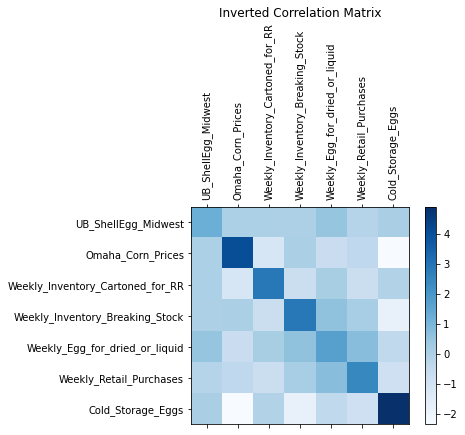

In [111]:
#I removed the Egg Midwest Var
ivar = df[['Omaha_Corn_Prices','Weekly_Inventory_Cartoned_for_RR','Weekly_Inventory_Breaking_Stock','Weekly_Egg_for_dried_or_liquid','Weekly_Retail_Purchases','Cold_Storage_Eggs','Monthly_Egg_Production']]
pd.set_option('display.max_columns', 8)
print('== Inverted Correlation Matrix ==')
print('')
print(pd.DataFrame(np.linalg.inv(ivar.corr()), index=ivar.columns, columns=ivar.columns))
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(np.linalg.inv(ivar.corr()), cmap='Blues')
fig.colorbar(cax)
ax.set_xticklabels([''] + ['UB_ShellEgg_Midwest','Omaha_Corn_Prices','Weekly_Inventory_Cartoned_for_RR','Weekly_Inventory_Breaking_Stock','Weekly_Egg_for_dried_or_liquid','Weekly_Retail_Purchases','Cold_Storage_Eggs','Monthly_Egg_Production'], rotation='vertical')
ax.set_yticklabels([''] + ['UB_ShellEgg_Midwest','Omaha_Corn_Prices','Weekly_Inventory_Cartoned_for_RR','Weekly_Inventory_Breaking_Stock','Weekly_Egg_for_dried_or_liquid','Weekly_Retail_Purchases','Cold_Storage_Eggs','Monthly_Egg_Production'])
ax.set_title('Inverted Correlation Matrix')
plt.show()


 # Non-Stationarity. From looking at the chart, it looks like the average is moving and one could argue there is some "seasonality",this is more clear as you shrink the window. Lets try to make a chart and look at moving average and variance

This is the moving average with a period of 1 year, I just used the moving average because my data is given to me at one month intervals; good for this sort of data but there are better ways to smooth
Whats really cool here is that we know that commodities trade in cycles and this is an easy way to see that vizualized


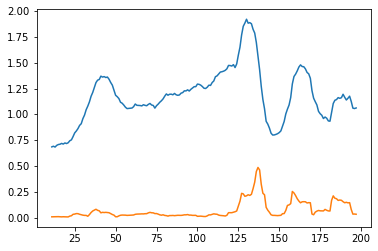

In [80]:
print('This is the moving average with a period of 1 year, I just used the moving average because my data is given to me at one month intervals; good for this sort of data but there are better ways to smooth')
df['UB_ShellEgg_Midwest'].rolling(window =12).mean().plot()
df['UB_ShellEgg_Midwest'].rolling(window =12).var().plot()
print('Whats really cool here is that we know that commodities trade in cycles and this is an easy way to see that vizualized')


# ATTENTION--- I couldn't find a ticker for "egg futures" so I used corn futures  to try to show some more statistics and coding skills

[*********************100%***********************]  1 of 1 completed


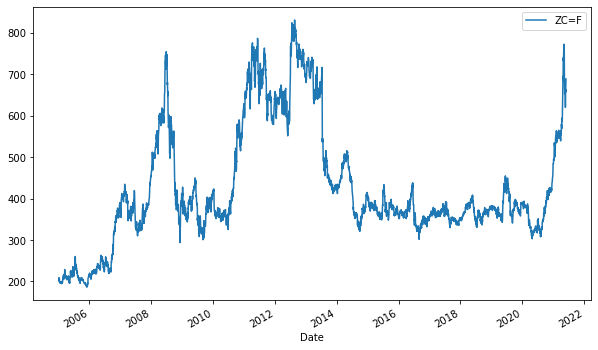

In [91]:
# Install yfinance (yahoo finance) 
!pip install yfinance
# Extract data from Yahoo Finance 
ticker = 'ZC=F' 
stock_data = pd.DataFrame()
stock_data[ticker] = yf.download(ticker, start = '2005-1-1', end = '2021-6-1')['Adj Close']
#plot closing prices 
stock_data.plot(figsize = (10,6));


# Distributions - Calculate Historical Returns and Statistical Measures 

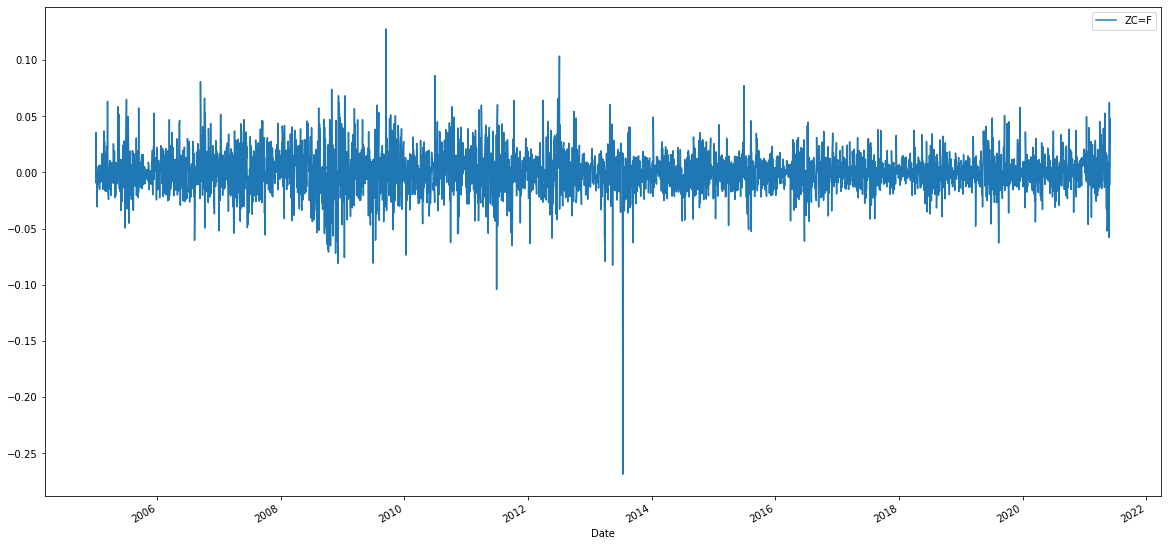

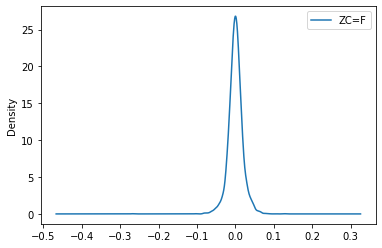

In [110]:
# Calcualte historical Log returns
log_returns = np.log(1+ stock_data.pct_change())
#show all the Log returns 
log_returns.plot(figsize = (20, 10));


# show the distriubtion of the log returns 
log_returns.plot.density();
# calculate key statistic measures
mean = log_returns.mean()
variance = log_returns.var()
STD = log_returns.std()
drift = mean - (0.5 * variance)

# Simulations- Simulate Future Daily Returns and Future Prices

ZC=F    0.000121
dtype: float64
ZC=F    0.000121
dtype: float64 [0.00012107]


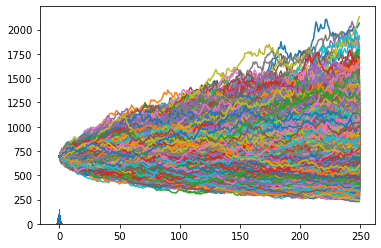

In [112]:
# Explain. Values 
print(drift)
print(drift, drift.values)
# Explain np.random.rand
test1 = np.random.rand(2,5)
test1
#Explain norm.ppf
test2 = norm.ppf(np.random.rand(5000))
plt.hist(test2, bins = 100)
#simulate future daily returns
t_intervals = 250 
simulations = 10000

daily_returns_simulated = np.exp(drift.values + STD.values  * norm.ppf(np.random.rand(t_intervals, simulations)))
daily_returns_simulated.shape
#create a variable for the latest price 
last_price = stock_data.iloc[-1]

# prepare an array for the price simulations
price_list = np.zeros_like(daily_returns_simulated)
# Set the frist row to the starting stock price 
price_list[0] = last_price
price_list
# apply a for loop for simulated prices
for t in range(1, t_intervals):
        price_list[t] = price_list[t - 1] * daily_returns_simulated[t]

# plot simulated future prices 
plt.plot(price_list);

# Quantifications - Examine the worst, average, best scenarios and the probability distribution


In [106]:
# set up confidence intervals 
upper68 = price_list[-1].mean()+price_list[1].std()
lower68 = price_list[-1].mean()-price_list[1].std()
upper95 = price_list[-1].mean()+price_list[1].std()*2
lower95 = price_list[-1].mean()-price_list[1].std()*2
max('price_list')


# Print out the price range within the confidence intervals 
print(f"68% price range: ${round(lower68, 2)} and ${round(upper68, 2)}")
print(f"95% price range: ${round(lower95, 2)} and ${round(upper95, 2)}")


68% price range: $727.54 and $753.59
95% price range: $714.51 and $766.62
